In [58]:
import sys
import math
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

from sklearn import tree

In [64]:
df = pd.read_csv ('data_1.csv',encoding='utf-8-sig')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('CA', axis=1, inplace=True)
df.drop('median_dom', axis=1, inplace=True)

In [88]:
# for column in df.columns:
#     print(column)
df.head()

# narrow region to only San Jose - housing markets are a highly regional, local market
df2 = df[df['San Jose']==1]
df2.head()

,city,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,...,42200,42220,43760,44700,45000,46020,46380,46700,47300,49700
254,1061,0.690528,0.562789,0.595794,0.690978,0.057971,0.056818,0.027778,0.015075,0.079208,...,0,0,0,0,0,0,0,0,0,0
268,771,0.248356,0.455903,0.296767,0.360028,0.028986,0.011364,0.009259,0.015075,0.128713,...,0,0,0,0,0,0,0,0,0,0
269,646,0.356464,0.694919,0.599913,0.547489,0.028986,0.056818,0.018519,0.055276,0.396040,...,0,0,0,0,0,0,0,0,0,0
415,680,0.824933,0.885326,0.637505,0.773874,0.260870,0.181818,0.287037,0.221106,0.237624,...,0,0,0,0,0,0,0,0,0,0
572,646,0.234234,0.467719,0.373561,0.445929,0.043478,0.267113,0.009259,0.010050,0.079208,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df2.columns

Index(['city', 'median_sale_price', 'median_list_price', 'median_ppsf',
       'median_list_ppsf', 'homes_sold', 'pending_sales', 'new_listings',
       'inventory', 'months_of_supply', 'avg_sale_to_list', 'sold_above_list',
       'price_drops', 'off_market_in_two_weeks', 'year', 'month',
       'MORTGAGE30US', 'PropertyType_All_Residential',
       'PropertyType_Condo/Co-op', 'PropertyType_Multi-Family(2-4 Unit)',
       'PropertyType_Single_Family_Residential', 'PropertyType_Townhouse ',
       'California', 'Anaheim', 'Bakersfield', 'Chico', 'Clearlake',
       'El Centro', 'Eureka', 'Fresno', 'Hanford', 'Los Angeles', 'Madera',
       'Merced', 'Modesto', 'Napa', 'Oakland', 'Oxnard', 'Red Bluff',
       'Redding', 'Riverside', 'Sacramento', 'Salinas', 'San Diego',
       'San Francisco', 'San Jose', 'San Luis Obispo', 'San Rafael',
       'Santa Cruz', 'Santa Maria', 'Santa Rosa', 'Sonora', 'Stockton',
       'Susanville', 'Truckee', 'Ukiah', 'Vallejo', 'Visalia', 'Yuba City',
   

In [108]:
#Apply L2 Norm...
#col=['median_sale_price', 'median_list_price', 'median_ppsf',
#       'median_list_ppsf', 'homes_sold', 'pending_sales', 'new_listings',
#       'inventory', 'months_of_supply', 'avg_sale_to_list',
#       'sold_above_list', 'price_drops', 'off_market_in_two_weeks']

# dimension reductions
col=['median_sale_price','inventory','avg_sale_to_list','off_market_in_two_weeks','MORTGAGE30US','quality']
X = df2[col]

X[col] = preprocessing.normalize(X[col], norm='l2')
X.columns

c:\python38\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


Index(['median_sale_price', 'inventory', 'avg_sale_to_list',
       'off_market_in_two_weeks', 'MORTGAGE30US', 'quality'],
      dtype='object')

# Plot a correlation matrix

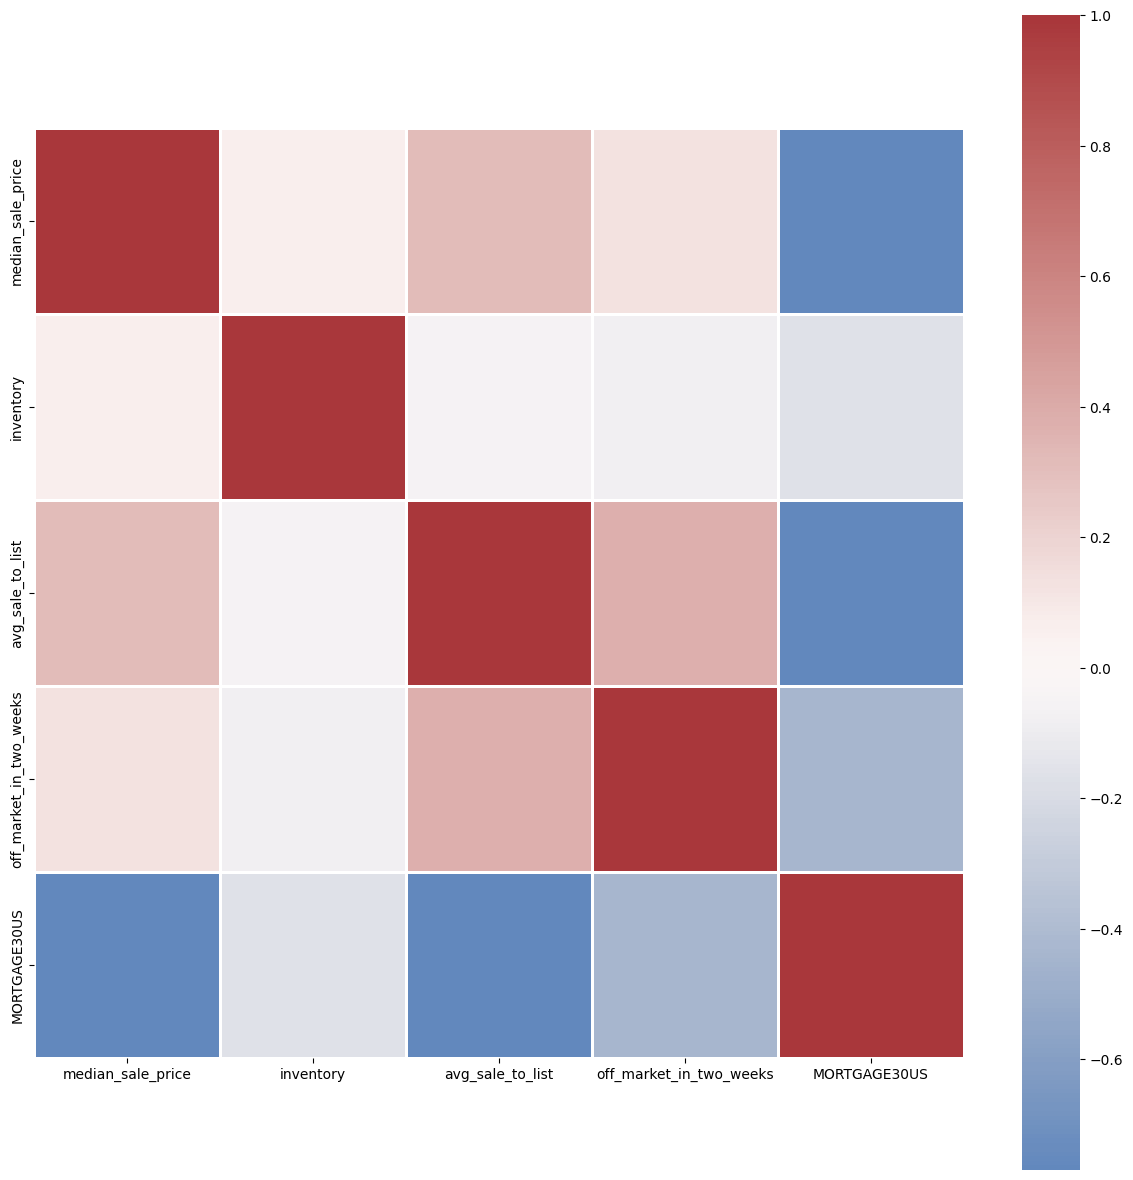

Done


In [91]:
import seaborn as sn
from matplotlib import rcParams
correlations = X.corr()
# figure size in inches
rcParams['figure.figsize'] = 15,15 #letter-size, in inches

# use a diverging colormap
sn.heatmap(correlations, cmap="vlag", center=0, square=True, linewidths=1)
plt.show()
#plt.savefig('correlationMatrix3.png')
plt.close()

print("Done")

array([[<AxesSubplot: title={'center': 'median_sale_price'}>,
        <AxesSubplot: title={'center': 'inventory'}>],
       [<AxesSubplot: title={'center': 'avg_sale_to_list'}>,
        <AxesSubplot: title={'center': 'MORTGAGE30US'}>]], dtype=object)

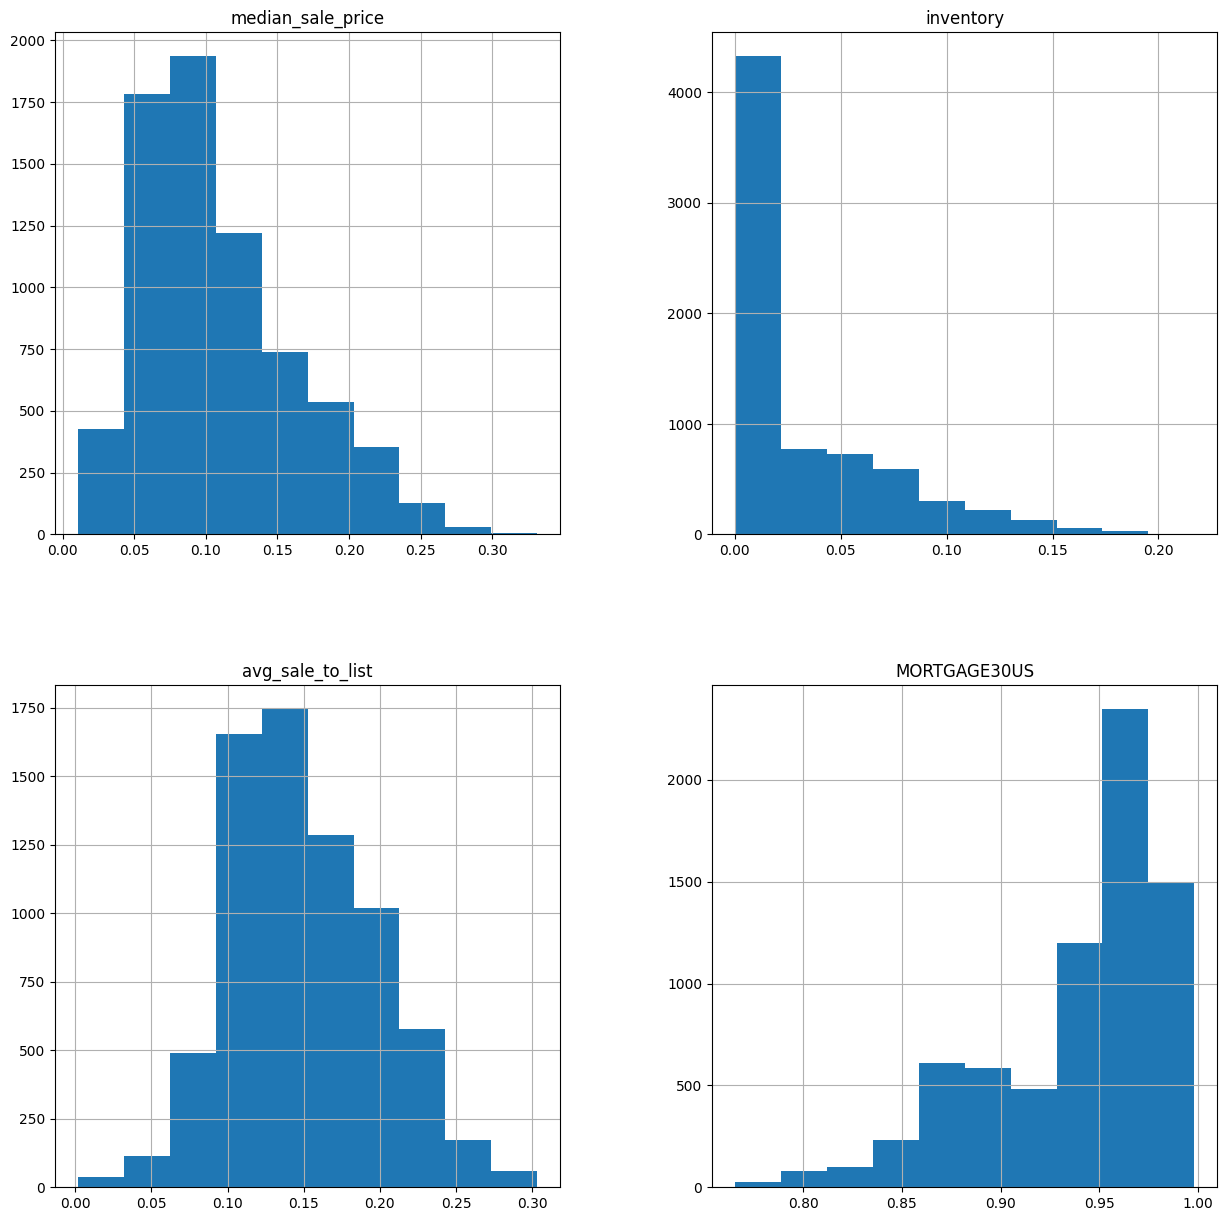

In [131]:
X.hist()

# Form a Baseline
We will use zero-rate classifier as our baseline for performance.
This classifier simply guesses the most frequent class each time.

In [105]:
# Check the distribution of each class and identify which one is most frequent.
unique, counts = np.unique(df2['quality'], return_counts=True)
print(dict(zip(unique, counts)))
print(df2['quality'].count())

{0: 3423, 1: 2027, 2: 1712}
7162


<AxesSubplot: >

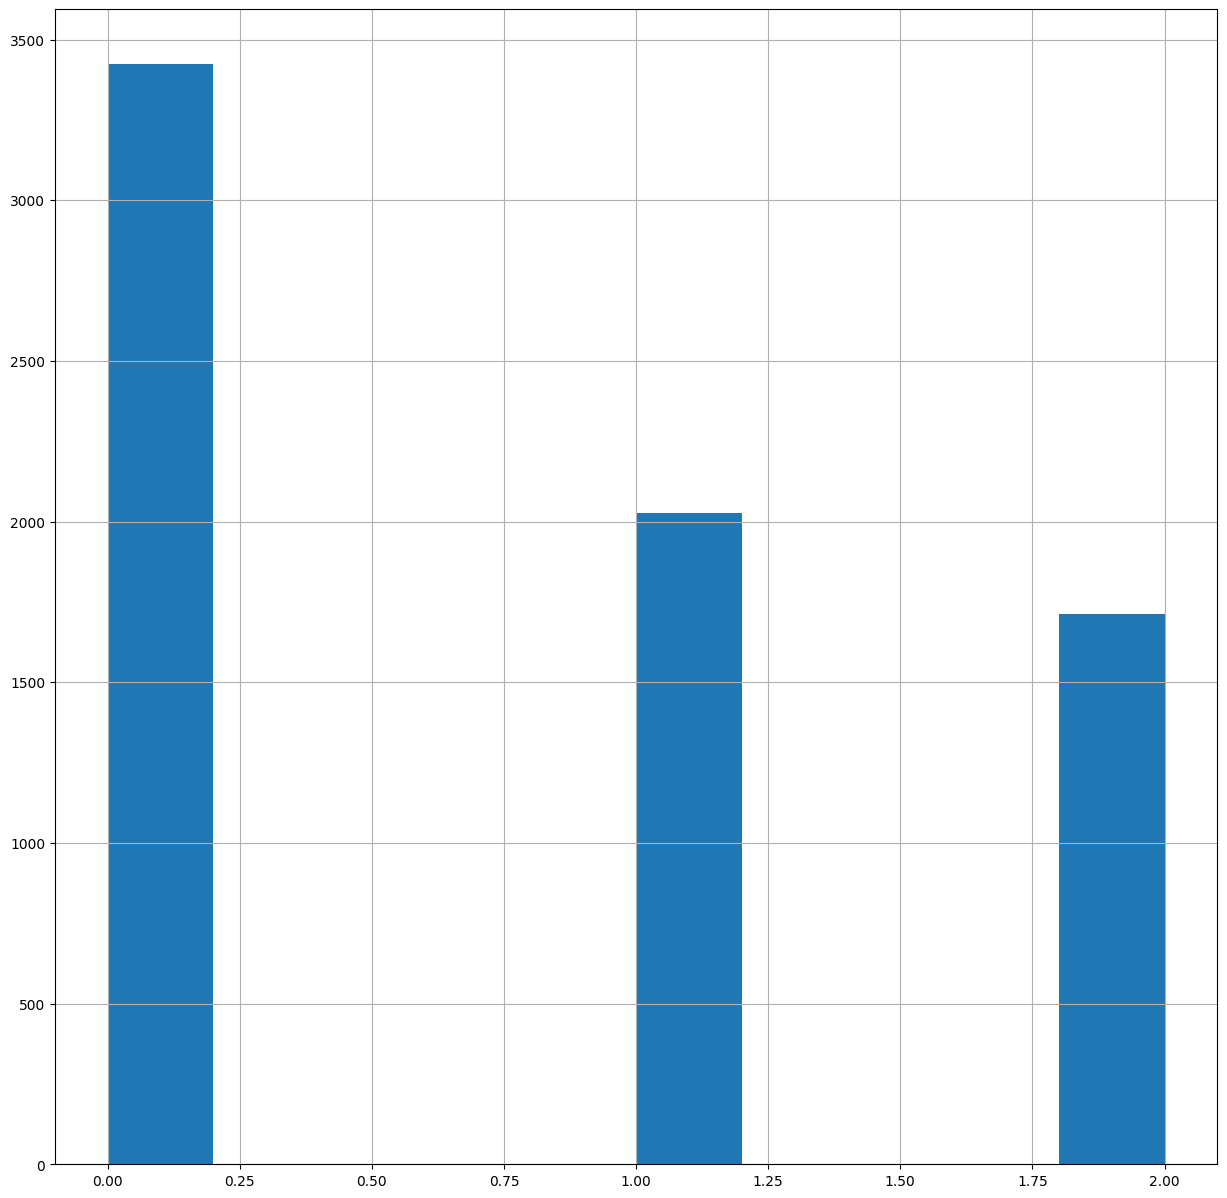

In [106]:
#Visualization
df2['quality'].hist()

The most frequently-occuring class is 0 with 3423 instances out of 7162

So 47.79% is our baseline.

In [95]:
#1157/3001
3423/7162

0.4779391231499581

# Prepare the Model

In [109]:
# categorical 1, 2, 3
# where "quality" is a measure of demand
y = df2['quality']

# remove the "quality" field from the input (that was added for the correlation matrix)
X = X.drop('quality',axis=1)
X = X.drop('off_market_in_two_weeks',axis=1)

X.head()

,median_sale_price,inventory,avg_sale_to_list,MORTGAGE30US
254,0.171821,0.003751,0.158438,0.971412
268,0.070647,0.004288,0.200564,0.977121
269,0.094127,0.014596,0.112835,0.835078
415,0.177533,0.047584,0.148508,0.867832
572,0.053998,0.002317,0.106566,0.991865


In [110]:
#, x_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=1)

In [111]:
print(X_train.columns)
print("X_train: "+str(len(X_train)))
print("X_test: "+str(len(X_test)))
print("X_val: "+str(len(X_val)))
print("\n")
print("y_train: "+str(len(y_train)))
print("y_test: "+str(len(y_test)))
print("y_val: "+str(len(y_val)))


Index(['median_sale_price', 'inventory', 'avg_sale_to_list', 'MORTGAGE30US'], dtype='object')
X_train: 5800
X_test: 717
X_val: 645


y_train: 5800
y_test: 717
y_val: 645


# Discover ideal max depth

In [112]:
test_scores = []
val_scores = []
train_scores = []

n=10
for i in range(1,n):
    dtc = DecisionTreeClassifier(max_depth=i,min_samples_leaf=1)
    dtc.fit(X_train,y_train)
    y_pred = dtc.predict(X_test)
    y_val_pred = dtc.predict(X_val)
    y_train_pred = dtc.predict(X_train)
    test_scores.append(round(accuracy_score(y_test,y_pred),4))
    val_scores.append(round(accuracy_score(y_val,y_val_pred),4))
    train_scores.append(round(accuracy_score(y_train, y_train_pred),4))

print("Test:")
print("best n:",test_scores.index(max(test_scores))+1, "/ max score:",max(test_scores))
print(test_scores)
print("Validation:")
print("best n:",val_scores.index(max(val_scores))+1, "/ max score:",max(val_scores))
print(val_scores)

Test:
best n: 8 / max score: 0.9833
[0.689, 0.8173, 0.9024, 0.9344, 0.9609, 0.9763, 0.9805, 0.9833, 0.9833]
Validation:
best n: 8 / max score: 0.9907
[0.662, 0.8016, 0.8977, 0.9349, 0.9597, 0.986, 0.9891, 0.9907, 0.9891]


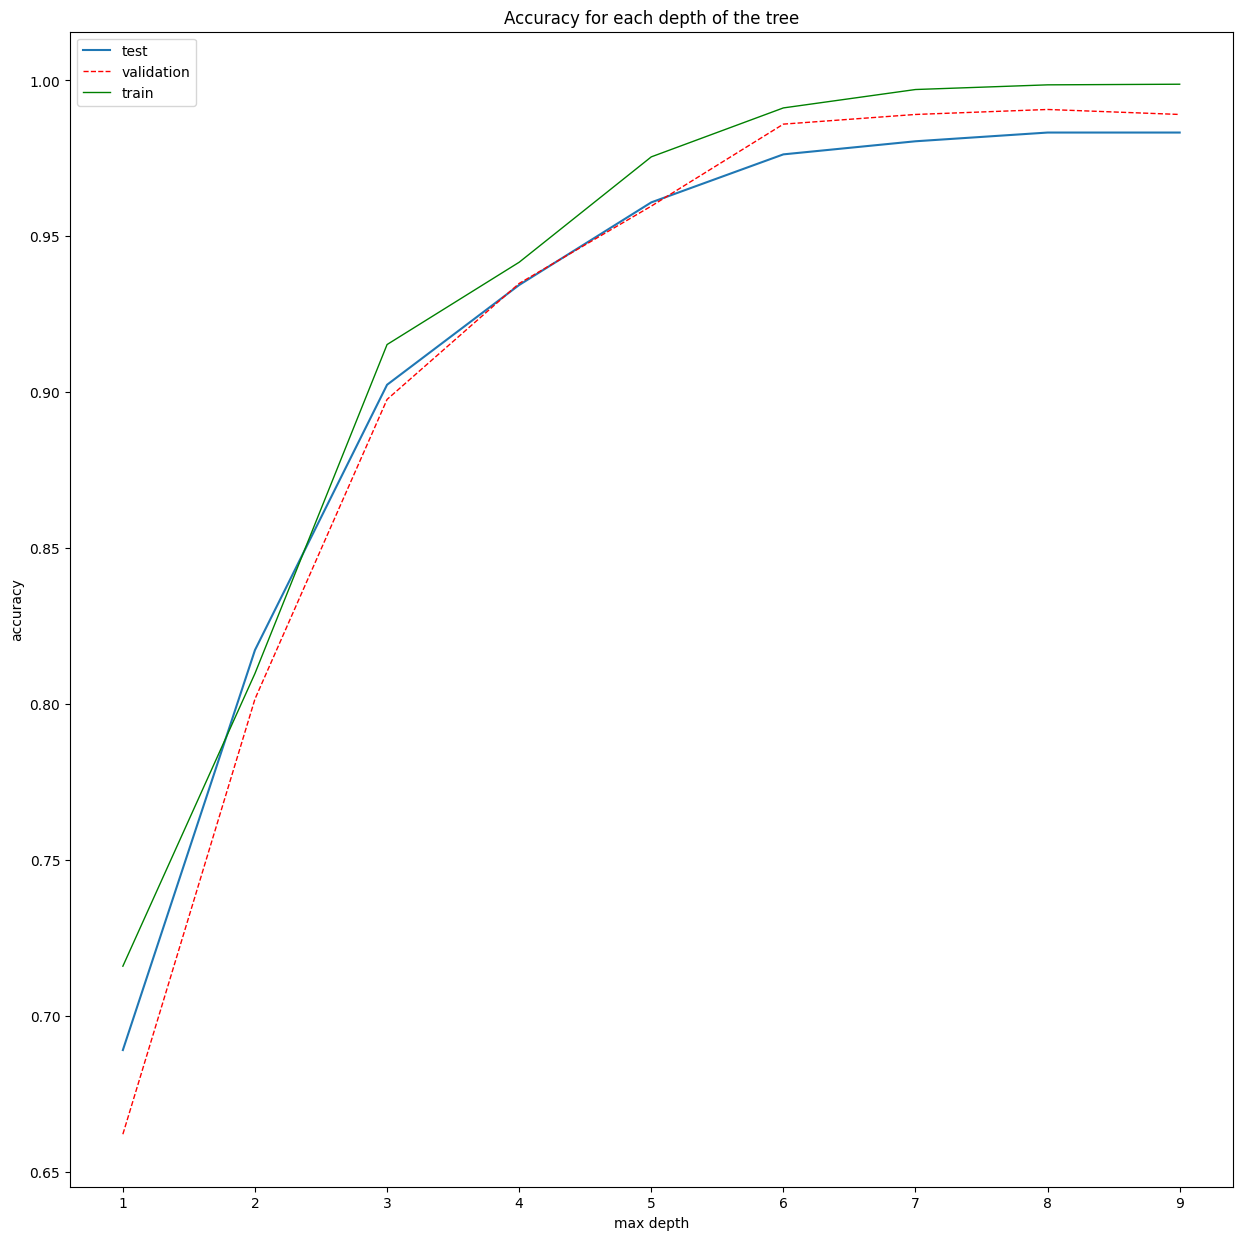

In [113]:
# Plot the accuracy scores

range_n = range(1,n)

plt.plot(range_n, test_scores, label="test")
plt.plot(range_n, val_scores, label="validation", color='red', linewidth=1.0, linestyle='--' )
plt.plot(range_n, train_scores,label="train",color='green',linewidth=1.0)
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.title("Accuracy for each depth of the tree")
plt.legend(loc="upper left")
plt.show()

In [130]:
from  sklearn.metrics import multilabel_confusion_matrix 

i = test_scores.index(max(test_scores))+1

print("max depth:",i)
dtc = DecisionTreeClassifier(max_depth=i,min_samples_leaf=1)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
y_val_pred = dtc.predict(X_val)
y_train_pred = dtc.predict(X_train)

#X_train, X_test, y_train, y_test

#multilabel_confusion_matrix(y_train,y_train_pred)
multilabel_confusion_matrix(y_val,y_val_pred)

max depth: 8


array([[[350,   0],
        [  5, 290]],

       [[429,   5],
        [  0, 211]],

       [[506,   0],
        [  0, 139]]], dtype=int64)

# Run the Model

In [119]:
dtc = DecisionTreeClassifier(random_state=42, max_depth=i)

In [134]:
dtc.fit(X_train,y_train)

# Test Set
print("----------------------Test Set---------------------")
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))
print("---------------------Validation Set-----------------")
# Validation Set
y_val_pred = dtc.predict(X_val)
print(classification_report(y_val, y_val_pred))

----------------------Test Set---------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       328
           1       0.98      0.96      0.97       216
           2       1.00      0.99      0.99       173

    accuracy                           0.98       717
   macro avg       0.99      0.98      0.98       717
weighted avg       0.98      0.98      0.98       717

---------------------Validation Set-----------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       295
           1       0.98      1.00      0.99       211
           2       1.00      1.00      1.00       139

    accuracy                           0.99       645
   macro avg       0.99      0.99      0.99       645
weighted avg       0.99      0.99      0.99       645



In [121]:
#Check train accuracy
y_train_pred = dtc.predict(X_train)
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2800
           1       1.00      1.00      1.00      1600
           2       1.00      1.00      1.00      1400

    accuracy                           1.00      5800
   macro avg       1.00      1.00      1.00      5800
weighted avg       1.00      1.00      1.00      5800



done


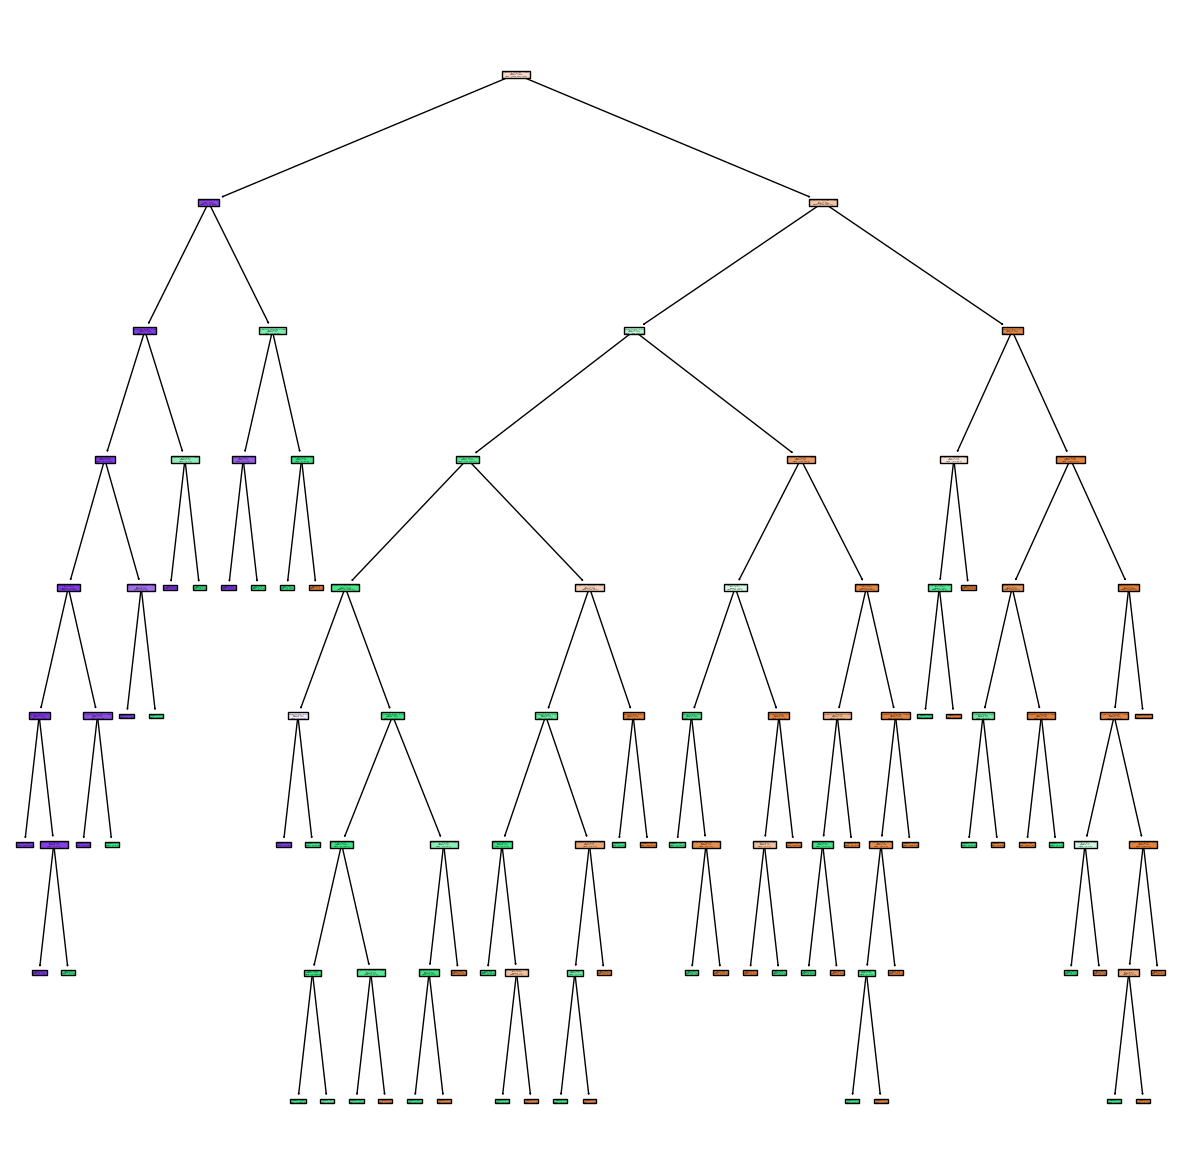

In [122]:
#fig = plt.figure(figsize=(20,25))
t = tree.plot_tree(dtc, feature_names=col, filled=True)
print("done")

#fig.savefig("decision_tree.png")
#print(col)